In [1]:
import uproot


branches=uproot.open('/Users/bertabeltran/muon_data/data/DShaped/DShapedHole_SiPMV3_coin_2Ch0_3Ch1_5LSB_20fC_LSB_waves/FILTERED/DataF_DShapedHole_SiPMV3_coin_2Ch0_3Ch1_5LSB_20fC_LSB_waves.root')['Data_F'].arrays()
nevt=len(branches)
print(str(nevt)+" events")
  


8470 events


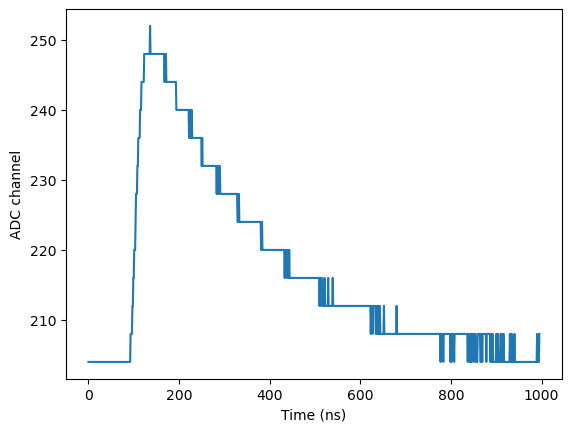

996


In [20]:
import matplotlib.pyplot as plt
plt.plot(branches['Samples'][45],label="channel "+str(branches['Channel'][0]))
plt.ylabel('ADC channel')
plt.xlabel('Time (ns)')
plt.show()
print(len(branches['Samples'][1]))

In [3]:
import ROOT
from ROOT import gStyle
from ROOT import TH1D,TH2D,TFile,TTree,TCanvas,TPad
gStyle.SetOptStat(0)
fFile = TFile('/Users/bertabeltran/muon_data/data/DShaped/DShapedHole_SiPMV3_coin_2Ch0_3Ch1_5LSB_20fC_LSB_waves/FILTERED/DataF_DShapedHole_SiPMV3_coin_2Ch0_3Ch1_5LSB_20fC_LSB_waves.root', "READ") 
fTree = fFile.Get('Data_F')
fTree.Show(10)

======> EVENT:10
 Channel         = 0
 Timestamp       = 1446653928499
 Board           = 0
 Energy          = 1326
 EnergyShort     = 257
 Flags           = 16384
 Probe           = 1
 Samples         = (TArrayS*)0x7ff4be390710


In [ ]:


nEntries = fTree.GetEntries()
print('numer of events',nEntries)
#declare variables that we are going to fill 
Samples[996]=0

#loop over the three 
#for i in range(0, nEntries): 
for i in range(0, 100): 
    fTree.GetEntry(i) 
    Channel=fTree.Channel
    Samples=fTree.Samples
        Energy_even=fTree.Energy
        if Channel_even==0:
            ECh0_list.append(Energy_even)
        else:
            ECh1_list.append(Energy_even)
    #if entry is odd we are the end of the event, store time and channel and calculate the time and energy difference 
    else:
        Channel_odd=fTree.Channel
        Timestamp_odd=fTree.Timestamp
        Energy_odd=fTree.Energy
        # I want to always do deltaT=chan0-Chan1 
        if Channel_odd==0 :
            TimeDiff=(Timestamp_odd-Timestamp_even)*10**(-3)#Convert picoseconds to nano
            EnergyDiff=Energy_odd-Energy_even
            ECh0_list.append(Energy_odd)
        else:
            TimeDiff=(Timestamp_even-Timestamp_odd)*10**(-3)
            EnergyDiff=Energy_even-Energy_odd
            ECh1_list.append(Energy_odd)           
        EDiff_list.append(EnergyDiff)
        TDiff_list.append(TimeDiff)